In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import auc,accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

In [44]:
df=pd.read_csv('/content/DMT_DATASET.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [46]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame containing the dataset
df = df.drop(columns=['customerID'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables to numerical using LabelEncoder
X = df.drop(columns=['Churn']).copy()  # Exclude the target variable 'Churn'
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column contains categorical data
        X[column] = label_encoder.fit_transform(X[column])

# Assign the target variable
y = df['Churn']

# Display the first few rows of X and y
print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())


Features (X):
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1   

In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X is your features DataFrame

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of scaled X
print("Scaled Features (X):")
print(X_scaled.head())


Scaled Features (X):
     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0 -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1  0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2  0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3  0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4 -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       0.062723        -1.183234       -0.918838      1.242550   
1      -0.991588        -1.183234        1.407321     -1.029919   
2      -0.991588        -1.183234        1.407321      1.242550   
3       0.062723        -1.183234        1.407321     -1.029919   
4      -0.991588         0.172250       -0.918838     -1.029919   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0         -1.027910    -0.925262    -1.1134

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [49]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
knn_preds=knn.predict(X_test)
print("Accuracy score: %f" %score)

Accuracy score: 0.751278


In [50]:
predict=knn.predict(X_test)
scores=cross_val_score(knn,X,y,cv=10)
print("\n K Nearest Neighbours: " + "Cross  Value Score: "+str(np.mean(scores)))

accuracy=accuracy_score(y_test,predict)
print("Accuracy: %f" %accuracy)

precision=precision_score(y_test,predict,average='micro')
print("precision: %f" %precision)

recall=recall_score(y_test,predict,average='micro')
print("Recall: %f" %recall)

f1=f1_score(y_test,predict,average='micro')
print("F1 Score: %f" %f1)


cm=confusion_matrix(y_test, predict)
print("\nConfusion Matrix \n",cm)

print("\nClassification Report")
print(classification_report(y_test,predict))


 K Nearest Neighbours: Cross  Value Score: 0.7528040377176015
Accuracy: 0.751278
precision: 0.751278
Recall: 0.751278
F1 Score: 0.751278

Confusion Matrix 
 [[1142  152]
 [ 286  181]]

Classification Report
              precision    recall  f1-score   support

          No       0.80      0.88      0.84      1294
         Yes       0.54      0.39      0.45       467

    accuracy                           0.75      1761
   macro avg       0.67      0.64      0.65      1761
weighted avg       0.73      0.75      0.74      1761



In [51]:
R=RandomForestClassifier()
R.fit(X_train,y_train)
score=R.score(X_test,y_test)
R_preds=R.predict(X_test)
print("Accuracy score: %f" %score)

Accuracy score: 0.783078


In [66]:
predict=R.predict(X_test)
scores=cross_val_score(R,X,y,cv=10)
print("\n RandomForest: " + "Cross  Value Score: "+str(np.mean(scores)))

accuracy=accuracy_score(y_test,predict)
print("Accuracy: %f" %accuracy)

precision=precision_score(y_test,predict,average='micro')
print("precision: %f" %precision)

recall=recall_score(y_test,predict,average='micro')
print("Recall: %f" %recall)

f1=f1_score(y_test,predict,average='micro')
print("F1 Score: %f" %f1)


cm=confusion_matrix(y_test, predict)
print("\nConfusion Matrix \n",cm)

print("\nClassification Report")
print(classification_report(y_test,predict))


 RandomForest: Cross  Value Score: 0.7949721953578337
Accuracy: 0.783078
precision: 0.783078
Recall: 0.783078
F1 Score: 0.783078

Confusion Matrix 
 [[1162  132]
 [ 250  217]]

Classification Report
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1294
         Yes       0.62      0.46      0.53       467

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [62]:
s=SVC(probability=True)
s.fit(X_train,y_train)
score=s.score(X_test,y_test)
s_preds=s.predict(X_test)
print("Accuracy score: %f" %score)



Accuracy score: 0.734810


In [67]:
predict=s.predict(X_test)
scores=cross_val_score(s,X,y,cv=10)
print("\n SVC: " + "Cross  Value Score: "+str(np.mean(scores)))

accuracy=accuracy_score(y_test,predict)
print("Accuracy: %f" %accuracy)

precision=precision_score(y_test,predict,average='micro')
print("precision: %f" %precision)

recall=recall_score(y_test,predict,average='micro')
print("Recall: %f" %recall)

f1=f1_score(y_test,predict,average='micro')
print("F1 Score: %f" %f1)


cm=confusion_matrix(y_test, predict)
print("\nConfusion Matrix \n",cm)

print("\nClassification Report")
print(classification_report(y_test,predict))


 SVC: Cross  Value Score: 0.7346300773694391
Accuracy: 0.734810
precision: 0.734810
Recall: 0.734810
F1 Score: 0.734810

Confusion Matrix 
 [[1294    0]
 [ 467    0]]

Classification Report
              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1294
         Yes       0.00      0.00      0.00       467

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.73      0.62      1761



In [58]:
nb=GaussianNB()
nb.fit(X_train,y_train)
score=nb.score(X_test,y_test)
nb_preds=nb.predict(X_test)
print("Accuracy score: %f" %score)


Accuracy score: 0.750142


In [68]:
predict=nb.predict(X_test)
scores=cross_val_score(nb,X,y,cv=10)
print("\n GaussianNB: " + "Cross  Value Score: "+str(np.mean(scores)))

accuracy=accuracy_score(y_test,predict)
print("Accuracy: %f" %accuracy)

precision=precision_score(y_test,predict,average='micro')
print("precision: %f" %precision)

recall=recall_score(y_test,predict,average='micro')
print("Recall: %f" %recall)

f1=f1_score(y_test,predict,average='micro')
print("F1 Score: %f" %f1)


cm=confusion_matrix(y_test, predict)
print("\nConfusion Matrix \n",cm)

print("\nClassification Report")
print(classification_report(y_test,predict))


 GaussianNB: Cross  Value Score: 0.7557855818826564
Accuracy: 0.750142
precision: 0.750142
Recall: 0.750142
F1 Score: 0.750142

Confusion Matrix 
 [[981 313]
 [127 340]]

Classification Report
              precision    recall  f1-score   support

          No       0.89      0.76      0.82      1294
         Yes       0.52      0.73      0.61       467

    accuracy                           0.75      1761
   macro avg       0.70      0.74      0.71      1761
weighted avg       0.79      0.75      0.76      1761



In [59]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
score=dt.score(X_test,y_test)
dt_preds=dt.predict(X_test)
print("Accuracy score: %f" %score)


Accuracy score: 0.732538


In [69]:
predict=dt.predict(X_test)
scores=cross_val_score(dt,X,y,cv=10)
print("\n DecisionTree: " + "Cross  Value Score: "+str(np.mean(scores)))

accuracy=accuracy_score(y_test,predict)
print("Accuracy: %f" %accuracy)

precision=precision_score(y_test,predict,average='micro')
print("precision: %f" %precision)

recall=recall_score(y_test,predict,average='micro')
print("Recall: %f" %recall)

f1=f1_score(y_test,predict,average='micro')
print("F1 Score: %f" %f1)


cm=confusion_matrix(y_test, predict)
print("\nConfusion Matrix \n",cm)

print("\nClassification Report")
print(classification_report(y_test,predict))



 DecisionTree: Cross  Value Score: 0.7249738072211478
Accuracy: 0.732538
precision: 0.732538
Recall: 0.732538
F1 Score: 0.732538

Confusion Matrix 
 [[1062  232]
 [ 239  228]]

Classification Report
              precision    recall  f1-score   support

          No       0.82      0.82      0.82      1294
         Yes       0.50      0.49      0.49       467

    accuracy                           0.73      1761
   macro avg       0.66      0.65      0.66      1761
weighted avg       0.73      0.73      0.73      1761



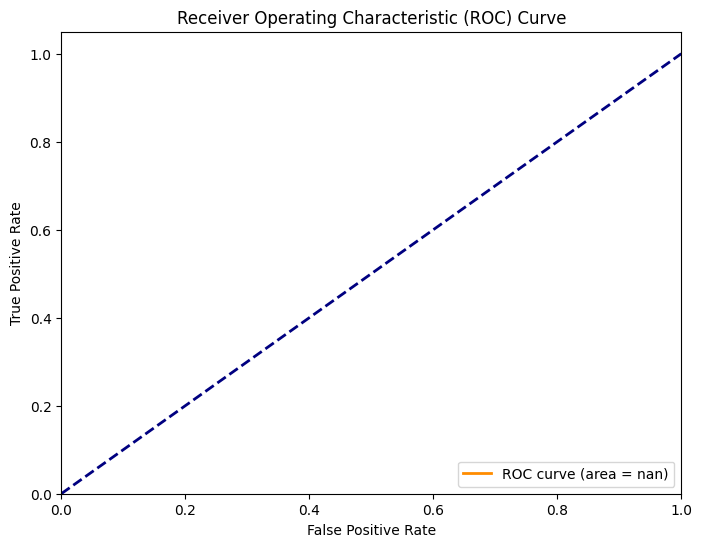

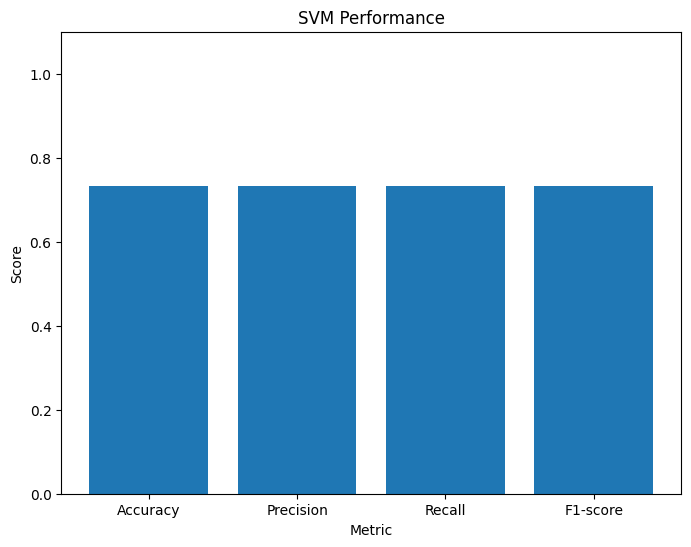

In [63]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, s.predict_proba(X_test)[:, 1], pos_label='pos')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('SVM Performance')
plt.ylim(0, 1.1)
plt.show()